In [5]:
import cnn_model
import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [6]:

target_image = "test-sushi.jpg"

im_rows = 32 # 이미지의 높이
im_cols = 32 # 이미지의 너비
im_color = 3 # 이미지의 색공간
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

LABELS = ["버거", "김밥", "라면"]
CALORIES = [588, 118, 648]


In [8]:
# 저장한 CNN 모델 읽어 들이기
model = cnn_model.get_model(in_shape, nb_classes)
model.load_weights('./image/photos-model-light.hdf5')


In [9]:

def check_photo(path):
    # 이미지 읽어 들이기
    img = Image.open(path)
    img = img.convert("RGB") # 색공간 변환하기
    img = img.resize((im_cols, im_rows)) # 크기 변경하기
    plt.imshow(img)
    plt.show()
    # 데이터 변환하기
    x = np.asarray(img)
    x = x.reshape(-1, im_rows, im_cols, im_color)
    x = x / 255

    # 예측하기
    pre = model.predict([x])[0]
    idx = pre.argmax()
    per = int(pre[idx] * 100)
    return (idx, per)

def check_photo_str(path):
    idx, per = check_photo(path)
    # 응답하기
    print("이 사진은", LABELS[idx], "로(으로), 칼로리는", CALORIES[idx],"kcal입니다.")
    print("가능성은", per, "%")


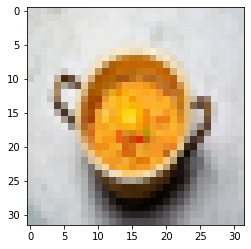

이 사진은 버거 로(으로), 칼로리는 588 kcal입니다.
가능성은 96 %


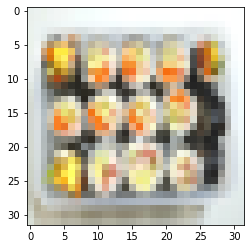

이 사진은 김밥 로(으로), 칼로리는 118 kcal입니다.
가능성은 60 %


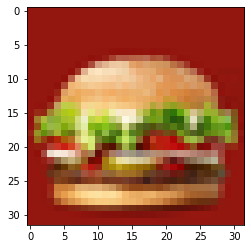

이 사진은 버거 로(으로), 칼로리는 588 kcal입니다.
가능성은 90 %


In [13]:

if __name__ == '__main__':
    check_photo_str('test-ramen.jpg')
    check_photo_str('test-kimbab.jpg')
    check_photo_str('test-burger.jpg')